<font size='10' color = 'E3A440'>**Pre-confèrence Workshop on Python**</font>
=======

<font color = 'E3A440'>*Pratical introduction to the analysis of unstructured data*</font>
=============

This tutorial is a short hands-on workshoop to introduce to the analysis of unstructured data for innovation studies. 

Structure of the workshop:
1. Presentation of section 1 and 2 in a plenary mode (20 minutes)
2. Individual work on section 2 and 3 (20 minutes)
3. Group work on section 3 (60 minutes)
4. Plenary section with presentation from groups (20 minutes)

This tutorial cannot be considered as ehaustif of the domain. 

### Auteurs: 
- Mikael Heroux-Vaillancourt <mikael.heroux-vaillancourt@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>
- Pietro Cruciata <pietro.cruciata@polymtl.ca>
- Alvar Herrera <alvar.herrera@polymtl.ca> 

### Table des matières

- [Section 0. Introduction](#introduction)
- [Section 1. Preparation of data](#pre-processing)
- [Section 2. Descriptive statistics](#desc-stat)
- [Section 3. Analysis](#analysis)
- [Section 4. Conclusions](#concluding-remarks)

<a id='introduction'></a>
# <font size = '6' color='E3A440'>Section 0. Introduction</font>

This workshop is based on the research work of **Mikael Heroux-Vaillancourt** presented at the [P4IE Conference - Measuring Metrics that Matter](https://event.fourwaves.com/p4ie/pages), which took place  on -10-11 May 2022 at the *Hilton Garden Inn*, in Ottawa.

To get more informaiton about the presentation, we address you to this [link]() wich contains the presentation.

In order to succes this workshop, few concept have to been underlined:

1. This study is an exploratory analsyis fo several compabines which obtained a [BCorp certification](https://www.bcorporation.net/en-us/)
2. The data analysed come from a webscraping step of the snapshots found on [Wayback Machine](https://archive.org/web/) of all those companis of point 1.
3. Objectives are ...
To


### Glossary of the workshop

Here, we list some terms that are used in this workshop:

1. <font color='E3A440'><b>Dataframe</b></font>: a data structure that organizes data into a 2-dimensional table of rows and columns
2. <font color='E3A440'><b>Metadata</b></font>: it is an information about an unstructured block of data (i.e., the author of a paper is a metadata of the text of that paper).
3. <font color='E3A440'><b>Token</b></font>: each sequence of character which constitue an indipendent linguistic unit, that is a word (i.e., each occurence of the verb eat is a different token).
4. <font color='E3A440'><b>Type</b></font>: The unique string of caracter which represent several occurrences of the same linguistic unit or word (i.e., the string 'eat' is the type for each token of the verb to eat).
5. <font color='E3A440'><b>POS tag</b></font>:  a process which aims to assign parts of speech to each word of a given text
6. <font color='E3A440'><b>Stopwords</b></font>: it refers to words that are very low semantic content such as article (the, an), modals (would, must), etc. 
7. <font color='E3A440'><b>Lemmatization</b></font>: a process that reduces the inflected words properly ensuring that the root word belongs to the language
8. <font color='E3A440'><b>Document-Term matrix</b></font>: it is a matrix where rows represent segment of text and columns are filled by linguistic features of that segment of text.
9. <font color='E3A440'><b>Weighting</b></font>: it is the weigth a mathematical function provides for each linguistic feature of each segment of text (i.e., Term frequency, Tf-Idf, BM25, etc.)
10. <font color='E3A440'><b>K-means clustering</b></font>: an unsupervised statistic method aiming to partition *n* observations into *k* clusters based on their proximity to the centroid


### Some basic concepts
In text mining, the main step is to convert unstructured textual data in a mathematical model which can be used in statistical learning. Thus, we need to create a <font color='E3A440'>**Document-Term matrix**</font>, which is generally represented as follow:   
$$X = \begin{bmatrix} 
x_{11} & x_{12} & \ldots & x_{1p} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n1} & x_{12} & \ldots & x_{np} \\
\end{bmatrix}
$$ 

Thus, it is a matrix of size $n \times p$, where $n$ is the number of text segments and $p$ is the number of textual features selected. There textual feratuire can have different nature. In the most simple model, these features correpon to the set of types which resume each token of the corpus. In other terms, $p$ are the nombre of feature that caracterize a segment of text. 

When we apply a <font color='E3A440'>**clustering algorithm**</font> to this matrix, we want to group rows in a set of clusters which are homogeneous. This means to minimize the intra-classe inertie or the pairwise squared deviations of points in the same cluster:

$$ \underset{s}{\arg\min}\sum_{i=1}^{k}\frac{1}{\vert S_i\vert}\sum_\limits{x,y \in S_i}\Vert x-y \Vert^2$$

This kind of algorithm aims to create a vector $Y$ of size $n$, containing the <font color='E3A440'>**cluster label**</font> assigned to each segment of text from $1$ to $k$.

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

Thus, $Y_1$ correspond to the cluster label given at $X_1$. Generally, $k$ is the main parameters of a clustering algorithm, which represent the number of cluster into which group text segments.

## 0.1 Preparation of Colab Virtual Machine

In order to work correctly on Colab, we need to prepare the environment by executing two main steps:
1. Download data from the GitHub project 
2. Install package to run code of this workshop

In [ ]:
# Downloading of datat from the GitHub project
!rm -rf TEST_PRECONFERENCE/
!git clone https://github.com/puli83/TEST_PRECONFERENCE

Cloning into 'TEST_PRECONFERENCE'...
remote: Enumerating objects: 283, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 283 (delta 12), reused 0 (delta 0), pack-reused 252
Receiving objects: 100% (283/283), 74.86 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
# Installation of packages
!pip install pickle5
!pip install nltk
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 256 kB 6.9 MB/s 
     |████████████████████████████████| 12.0 MB 7.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## 0.2 Import packages

We import the following packages that contain the functions needed to accomplish our task: 
- `re` une librairie pour les expressions régulières
- `matplotlib` pour tracer des graphiques
- `numpy` pour des fonctions d'algèbre linéaire
- `pandas` pour manipuler les données
- `sklearn` (scikit-learn) pour des modèles d'apprentissage automatique ainsi que des fonctions reliées à la pratique de l'apprentissage automatique
- `spacy` designed to build information extraction or natural language understanding systems. It supports several functions to performs several NLP task such us POS tag and NER
- `nltk` include over 50 corpora, access to lexical resources such as WordNet and function to perform text processing task as tokenization, tagging and parsing 

In [ ]:
import pandas as pd
import numpy as np
import scipy
import datetime
import os
import pickle5 as pickle
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer #, TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#% matplotlib inline
#import sys
#sys.path += ['TEST_PRECONFERENCE/']
import seaborn as sns


## 0.3 Custum function definition
In the next chuck of code we define some function we need for processing

In [ ]:
def prepare_data_for_WC(DTM, vocabulary_dtm):
    # compute total frequency for each word
    values_words = sum(DTM)
    #values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC

## 0.4 Import data



The following code set the paths from which import data.

In [ ]:
ROOT_DIR='TEST_PRECONFERENCE/'
DATA_DIR=os.path.join(ROOT_DIR, 'Data')

---
We import a `.csv` file. The data imported are in a tabular format (such as MS Excel) called **dataframe** and managed by `pandas`.

In [ ]:
df_data = pd.read_csv(os.path.join(DATA_DIR, 'BCorp_companies_Web_Data.csv'))

---
We observe *1207* rows and *2* columns.

In [ ]:
df_data.shape

(1184, 129)

---
Further exploring some rows, we observe that the table contains two columns: one with some webpages domain and the other one with textual data.

+ **company_id** contains the domain of each BCorp companies under study
+ **text_combined** contains a combination of all those pages founded in Wayback Machine for each company.


In [ ]:
df_data.head()

---
Here, we give a list of some important metadata to explore

In [ ]:
df_data[['website', 'company_name', 'date_certified', 'description', 'industry',
       'industry_category','country', 'state', 'city', 'sector','assessment_year', 'overall_score']]


# <font size = '6' color='E3A440'>Section 1: Data pre-processing </font>
 This section declines the main aspect of a classical preprocessing step of textual data. The main objective of this step is to organize unstructured data into a structure which can be digestible in a statistical learning process. In few words, this process allow to transform text into vectors and is diveded in three main operations: 
 1. Morphosyntactic Analysis
 2. Filter of lexical features
 3. Vectorisation of lexical features

## 1.1 Filter docuemnt


In [ ]:
df_data['text_web_page'].apply(len).describe()

count     1184.000000
mean      1661.388514
std       2272.368263
min         16.000000
25%        503.750000
50%       1088.500000
75%       2002.500000
max      35748.000000
Name: text_web_page, dtype: float64

In [ ]:
sum(df_data['text_web_page'].apply(len) < 200)

126

## 1.2 Morphosyntactic Analysis
One the most important operation in preprocessing unstructured textual data is to detect the morphosyntactic features of words. This allow to understand roles that words has in their contexts. This operation is composed by two parts:
1. Part-of-Speech tagging, generally known as POS tagging
2. Lemmatisation, which consists in the reduction of a word to his lemma

These two sub-operations can be excuted by different type of algorithms. We use a neural network pre-trained model using the module named `spacy`. In particular, we use the function `nlp.pipe()` to generate a list of preprocessed documents. This function has several arguments and it takes a list of string character to be executed. Each element of this list is a textual segment or a document. 


In this first chunck of code we load from `spacy` the pretrained model  called <font color="#CE9178">en_core_web_sm</font> ([More info](https://spacy.io/models/en)).   

In [ ]:
nlp = spacy.load('en_core_web_sm')

---
In this second chunk, we apply the NLP pipeline to our textual data contained in the **text_combined** column, and this, by using the `nlp.pipe()` function. 

Thus, we generate the `preprocessed_docs` variable, which is a list containing preprocessed text of all the documents. We can observe the first docuemnt with `preprocessed_docs[0]`, the second with `preprocessed_docs[1]`, the third with `preprocessed_docs[2]`, etc.

Each element of the list `preprocessed_docs`, contains a list of word with several analysis associated to it.

In [ ]:
t0 = datetime.datetime.now() # line of code to register a timestamp 
preprocessed_docs = list(nlp.pipe(df_data["text_web_page"], disable = ["tok2vec",'parser','ner']))
print(str(datetime.datetime.now() - t0)) # line of code to print the elapsed time from t0

0:00:15.149201


---
In the next chunck, we look at the first document in his **original format**

In [ ]:
# Print first segment of the corpus
print(df_data.loc[0]["text_web_page"])

Know where your food comes from. Our mission is to establish a viable, dynamic and sustainable local food economy whereby chefs have access to the freshest and best products that Ontario has to offer, and Ontario producers have a dedicated channel for the sales, marketing and distribution of their products at a fair price. Order By category © 2016 100km Foods All Rights Reserved. We want you to know where your food comes from. Order By category © 2015 100km Foods All Rights Reserved. The Ordering Site is now Closed. Please look for our email announcing the site has reopened. Our mission is to establish a viable, dynamic and sustainable local food economy whereby chefs have access to the freshest and best products that Ontario has to offer, and Ontario producers have a dedicated channel for the sales, marketing and distribution of their products at a fair price. 100km Foods Inc. specializes in the sale and distribution of local, sustainable foods, with a comprehensive offering, includin

Instead, in this chunck we look at the **preprocessed version** of this first document. In particular, we print three attributes for each word of the first docuemnt:
1. `word.text`, which correspond to the original version of the word, which is called **token**.
2. `word.pos_`, which correspond to the POS tag predicted for that word.
3. `word.lemma_`, which correspond to the lemma of the token.

For padagogical reason, we only look at the first 10 words.


In [ ]:
# Print morphosyntactial analysis of the first sentence of the corpus. Each element is separeted by a vertitcal line |
for idx, word in enumerate(preprocessed_docs[0]):
    print("Token: ", word.text, " | ", "POS tag: ", word.pos_," | ", "Lemma of the token: ", word.lemma_)
    # Break loop after first 10 words -> idx==10
    if idx == 10:
        break

Token:  You  |  POS tag:  PRON  |  Lemma of the token:  -PRON-
Token:  have  |  POS tag:  AUX  |  Lemma of the token:  have
Token:  no  |  POS tag:  DET  |  Lemma of the token:  no
Token:  items  |  POS tag:  NOUN  |  Lemma of the token:  item
Token:  in  |  POS tag:  ADP  |  Lemma of the token:  in
Token:  your  |  POS tag:  DET  |  Lemma of the token:  -PRON-
Token:  shopping  |  POS tag:  NOUN  |  Lemma of the token:  shopping
Token:  cart  |  POS tag:  NOUN  |  Lemma of the token:  cart
Token:  .  |  POS tag:  PUNCT  |  Lemma of the token:  .


## 1.2 Filter of lexical features

In this section, we perform several pre-processing steps to transform the text to a format that can be understood and analyzed by our methods. 
1.   Eliminating stopwords : removing the low-level information from our text in order to give more focus to the important information
2.   Keeping only adverb, adjective, noun and verb


In the following chunck, we load the list of english **stopwords** from the package `nltk` and we add the verb "would" that is not among the modale verbs included in this list. Indeed, this list is editable by the user according to the different goals.

In [ ]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---
In the following chunk of code, we will use the previous the list of stopwords to filter words and the POS tag analysis to select only the words that are adverbs, adjectives, nouns and verbs to further highlight the part of speach meaningfull for our task.

In [ ]:
for idx, i in enumerate(preprocessed_docs):
    print(f"Sentence n. {idx}")
    print("Original :\t ", df_data.loc[idx]['text_web_page'])
    print("Preprocessed:\t ", [w.lemma_.lower() for w in i if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"]  and w.text.lower() not in stopwords_list])
    if idx == 5:
        break

Sentence n. 0
Original :	  You have no items in your shopping cart.
Preprocessed:	  ['item', 'shopping', 'cart']
Sentence n. 1
Original :	  Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outlin

In [ ]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, i in enumerate(preprocessed_docs): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
    text = [w.lemma_.lower() for w in i if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    spacy_object = [w for w in i if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
    spacy_lst_object.append(spacy_object)
    
df_data["text_cleaned"] = text_cleaned
df_data["text_spacy_prepross"] = spacy_lst_object


## 1.3 Vectorisation of lexical features

In the following section, we create the word matrix that will be used in our model tranforming a collection of text documents to a matrix of token counts. The following code is used to set the parameters of the matrix that we will create.

In [ ]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 5, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 450, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

---
The following chunk of code we use the `nltk` learn a vocabulary dictionary of all tokens in the raw documents.

In [ ]:
freq_term_DTM = vectorized.fit_transform(df_data["text_cleaned"])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  % sorted(inconsistent)


In [ ]:
freq_term_DTM

<1184x2997 sparse matrix of type '<class 'numpy.int64'>'
	with 91958 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

<a id="desc-stat"></a>
# <font size = '6' color='E3A440'>Section 2: Descriptive statistics</font>
In orderr to explore the corpus preprocessed, we should begin from desciptives statistics.


In [ ]:
df_data['industry'].value_counts()

Food & Beverage                        164
IT Software & Services/Web Design       94
Marketing & Communications Services     92
Other                                   79
Home & Personal Care                    72
                                      ... 
Consumer Rewards                         1
Catering & Meeting/Event Management      1
Online Community                         1
Electronic Distribution                  1
Fitness & Wellness Centers               1
Name: industry, Length: 65, dtype: int64

In [ ]:
df_data['sector'].value_counts()

Service with Minor Environmental Footprint          635
Wholesale/Retail                                    243
Manufacturing                                       167
Service with Significant Environmental Footprint    102
Agriculture/Growers                                  32
Service                                               5
Name: sector, dtype: int64

In [ ]:
df_data.groupby(['industry','industry_category']).count()

,,website,company_id,company_name,date_first_certified,date_certified,current_status,description,products_and_services,country,state,...,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle,ID_certification,text_web_page
industry,industry_category,,,,,,,,,,,,,,,,,,,,,
Accounting Services,Business Products & Services,7,7,7,7,7,7,7,7,7,7,...,3,0,3,0,0,3,1,7,7,7
Agricultural Services,Agriculture,15,15,15,15,15,15,15,15,15,15,...,10,9,10,0,0,10,2,15,15,15
Animal Health,Health & Human Services,2,2,2,2,2,2,2,2,2,2,...,1,1,1,0,0,1,0,2,2,2
"Apparel, Footwear & Accessories",Consumer Products & Services,48,48,48,48,48,48,48,44,48,48,...,13,7,13,0,0,13,3,48,48,48
Architecture/Design/Planning,Building,16,16,16,16,16,16,16,16,16,16,...,5,0,5,0,0,5,0,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Telecommunications,Business Products & Services,3,3,3,3,3,3,3,3,3,3,...,2,0,2,0,0,2,0,3,3,3
Transportation & Logistics,Transportation & Logistics,7,7,7,7,7,7,7,7,7,7,...,5,3,5,0,0,5,0,7,7,7
Travel & Leisure,Education & Training Services,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,1


In [ ]:
df_data.groupby(['sector','industry']).count()

In [ ]:
df_data.groupby(['state','city']).count()

In [ ]:
df_data[df_data.country=='Canada'].groupby(['state','city']).count()

website  company_id  company_name  \
state            city                                             
Alberta          Calgary           13          13            13   
                 Edmonton           5           5             5   
British Columbia Burnaby            2           2             2   
                 Coquitlam          1           1             1   
                 Duncan             1           1             1   
...                               ...         ...           ...   
Québec           MontrealQ          1           1             1   
                 Montréal           1           1             1   
                 Quebec (QC)        1           1             1   
Saskatchewan     Saskatoon          1           1             1   
Yukon            Whitehorse         1           1             1   

                              date_first_certified  date_certified  \
state            city                                                
Alberta          Calgary                        13              13   
                 Edmonton                        5               5   
British Columbia Burnaby                         2               2   
                 Coquitlam                       1               1   
                 Duncan                          1               1   
...                                            ...             ...   
Québec           MontrealQ                       1               1   
                 Montréal                        1               1   
                 Quebec (QC)                     1               1   
Saskatchewan     Saskatoon                       1               1   
Yukon            Whitehorse                      1               1   

                              current_status  description  industry  \
state            city                                                 
Alberta          Calgary                  13           13        13   
                 Edmonton                  5            5         5   
British Columbia Burnaby                   2            2         2   
                 Coquitlam                 1            1         1   
                 Duncan                    1            1         1   
...                                      ...          ...       ...   
Québec           MontrealQ                 1            1         1   
                 Montréal                  1            1         1   
                 Quebec (QC)               1            1         1   
Saskatchewan     Saskatoon                 1            1         1   
Yukon            Whitehorse                1            1         1   

                              industry_category  products_and_services  ...  \
state            city                                                   ...   
Alberta          Calgary                     13                     13  ...   
                 Edmonton                     5                      5  ...   
British Columbia Burnaby                      2                      2  ...   
                 Coquitlam                    1                      1  ...   
                 Duncan                       1                      1  ...   
...                                         ...                    ...  ...   
Québec           MontrealQ                    1                      1  ...   
                 Montréal                     1                      1  ...   
                 Quebec (QC)                  1                      1  ...   
Saskatchewan     Saskatoon                    1                      1  ...   
Yukon            Whitehorse                   1                      1  ...   

                              ia_workers_it_occupational_health_safety  \
state            city                                                    
Alberta          Calgary                                             1   
                 Edmonton                                            1   

In [ ]:
df_data['overall_score'].describe()

count    1184.000000
mean       95.846030
std        16.064411
min        78.200000
25%        83.300000
50%        90.600000
75%       103.000000
max       170.500000
Name: overall_score, dtype: float64

In [ ]:
df_data[df_data['sector'] == 'Service with Significant Environmental Footprint']['overall_score'].describe()

count    102.000000
mean      95.006863
std       16.369818
min       80.000000
25%       84.025000
50%       89.700000
75%      100.150000
max      158.300000
Name: overall_score, dtype: float64

In [ ]:
df_data[df_data['sector'] == 'Service with Minor Environmental Footprint']['overall_score'].describe()

count    635.000000
mean      97.636063
std       16.850914
min       80.000000
25%       84.000000
50%       92.500000
75%      106.600000
max      168.400000
Name: overall_score, dtype: float64

## 2.1 Explore word frequency

In this section, we extract the word frequency from the webpages cleaned and we illustrate them through the wordcloud



---
In the next chunck of code we need to excete some intermediate operations to prepare data

In [ ]:
 vocab = vectorized.vocabulary_
 data_WC = prepare_data_for_WC(freq_term_DTM, vocab)
 

---
Then, 

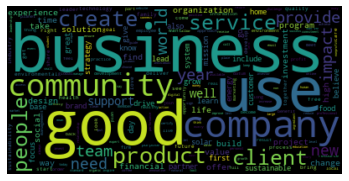

In [ ]:
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate_from_frequencies(" ".join(df_data["text_cleaned"][0]))
wordcloud = WordCloud().generate_from_frequencies(data_WC)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['sector'] == 'Wholesale/Retail'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
Or by state

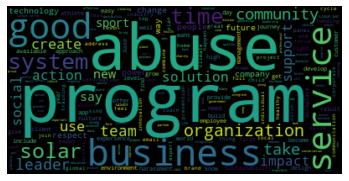

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['state'] == 'Alberta'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df_data['number_words_webpages']=df_data["text_cleaned"].apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

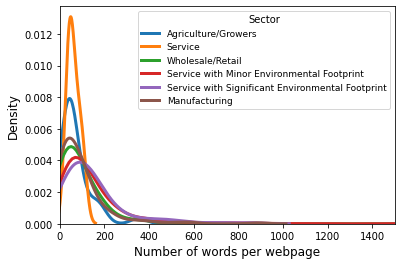

In [ ]:
for sector in df_data.sector.unique():
  # Subset to the authors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
  # sns.set(xlim=(-10, 1500))
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.show()

In [ ]:
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


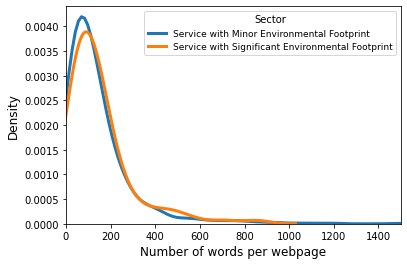

In [ ]:
for sector in lst_env_sector:
  # Subset to the authors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset['number_words_webpages'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
  # sns.set(xlim=(-10, 1500))
plt.legend(prop={'size': 9}, title='Sector')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.show()

In [ ]:
data_MEF=df_data[df_data['sector']=="Service with Minor Environmental Footprint"]

In [ ]:
data_MEF["number_words_cleaned"]=data_MEF["text_cleaned"].apply(len)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


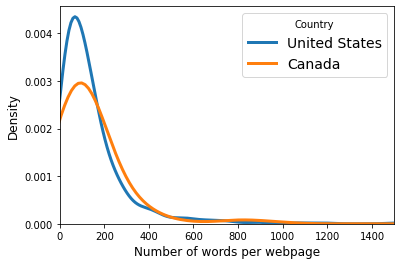

In [ ]:
for country in data_MEF.country.unique():
  # Subset to the authors
  subset = data_MEF[data_MEF.country == country]
  sns.distplot(subset["number_words_cleaned"], hist=False, kde=True, kde_kws={'linewidth': 3}, label=country)
  # sns.set(xlim=(-10, 1500))
plt.legend(prop={'size': 14}, title='Country')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.show()

In [ ]:

lst_VERB=[]
for i in df_data["text_token"]:
  cont=sum(1 for x in i if x.pos_=="VERB")
  lst_VERB.append(cont)
df_data["number_VERB"]=lst_VERB

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

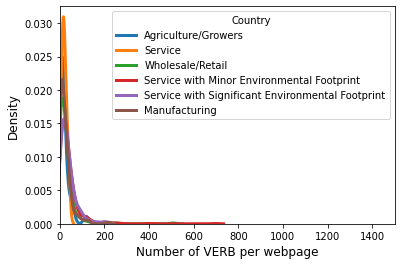

In [ ]:
for sector in df_data.sector.unique():
  # Subset to the authors
  subset = df_data[df_data.sector == sector]
  sns.distplot(subset["number_VERB"], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
  # sns.set(xlim=(-10, 1500))
plt.legend(prop={'size': 10}, title='Country')
# plt.title('Density Plot for Each Author')
plt.xlabel('Number of VERB per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.show()

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data[df_data['state'] == 'Alberta'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<a id="analysis"></a>
# Section 3: Analysis 

In this section, you will analyze 

In [ ]:
df_data['sector'].value_counts()

Service with Minor Environmental Footprint          635
Wholesale/Retail                                    243
Manufacturing                                       167
Service with Significant Environmental Footprint    102
Agriculture/Growers                                  32
Service                                               5
Name: sector, dtype: int64

<a id="modelling"></a>
# Section 2: Modélisation 

Les notes ou *ratings* ([échelle de Likert](https://fr.wikipedia.org/wiki/%C3%89chelle_de_Likert)) sont des quantités ordinales. Par contre, pour faciliter la modélisation, nous les traiterons comme des valeurs réelles (nous discuterons de ces questions à la semaine 11). Nous mesurerons donc l'erreur (la fonction de perte) carrée moyenne:

$$ \text{MSE}(f(x),y) := \frac{1}{n} \sum_{i=0}^n (f(x_i) - y_i)^2$$ 

La MSE est la distance moyenne entre la prédiction ($f(x_i)$) et l'étiquette ($y_i$). La fonction MSE retourne une quantité non négative et le modèle parfait a une MSE de $0$. Si le Modèle #1 a une plus petite MSE que le Modèle #2, alors le Modèle 1 est meilleur selon cette mesure.

*Entraînement/Test:* rappelez vous que bien que nous estimions les paramètres du modèle à partir de l'ensemble **d'entraînement**, nous évaluons la qualité du modèle à partir des données de **test**.

### 2.1 Un premier modèle: prédire la moyenne

Il est souvent pratique d'obtenir un point de comparaison en utilisant une méthode très simple. 

Notre méthode étalon sera un modèle qui prédit la moyenne des notes d'entraînements. C'est donc un modèle constant qui ne prend pas en compte les attributs (des utilisateurs ou des films): 

$$ 
y_{ui} = \text{moyenne globale}
$$

*Particularité des systèmes de recommandations:* nous pourrions sand doute obtenir un modèle un peu plus performant en prédisant, pour chaque utilisateur la moyenne de ses notes (ou de manière équivalente pour les items) plutôt que la moyenne globale des notes.

In [ ]:
# Quantifier l'erreur de prédiction du modèle étalon

print("Modèle constant")

print("\tErreur carrée moyenne d'entraînement: %.3f"
      % mean_squared_error(y_train, 
                           np.full_like(y_train, y_train.mean())))
print("\tErreur carrée moyenne de test: %.3f"
      % mean_squared_error(y_test, 
                           np.full_like(y_test, y_train.mean())))

Modèle constant
	Erreur carrée moyenne d'entraînement: 1.577
	Erreur carrée moyenne de test: 1.572


Les erreurs d'entraînement et de test sont, dans ce cas, très proches (la différence n'est peut-être pas significative statistiquement). Notre modèle est très simple (en apprentissage automatique on dirait qu'il a sans doute un biais élevé) et on n'imaginerait donc pas que sa performance fluctue énormément d'un ensemble de test à un autre (petite variance).

Cette erreur de test indique qu'en moyenne nos prédictions sont à 1.3 unité ($sqrt{1.6}$) de la véritable note. Ça indique donc que nous ne devrions pas être trop surpris que le modèle prédise une note sous 4 pour un film que nous aurions noté comme un 5. Cela dit, cette valeur reste quelque peu abstraite (est-ce un bon modèle ou non?) au moins jusqu'à ce qu'on la compare à la performance d'autres modèles.

### 2.2 Régression Linéaire

Pour ce second modèle, nous utiliserons un modèle de régression linéaire des notes à partir des attributs des utilisateurs. Nous utiliserons le sexe des utilisateurs, leur âge, leur code postal et leur emploi. Nous estimons ce modèle
$$
f(x_{ui}) = \theta_\text{gender} x_{\text{gender}_u} + \theta_{\text{age}} x_{\text{age}_u} + \theta_\text{zip} x_{\text{zip}_u} + \theta_\text{occupation} x_{\text{occupation}_u} + \theta_\text{uid} x_{\text{uid}_u} + \theta_{\text{mid}} x_{\text{mid}_i}
$$ 

$\theta_{1:6}$ sont les paramètres, $\text{gender}_u$ est le sexe de l'utilisateur $u$, nous utilisons une notation similaire pour les autres attributs. Aussi, $x_{\text{uid}_u}$ est l'identité de l'utilisateur, c'est similaire pour $x_{\text{mid}_i}$ et les films.

Veuillez noter que quelques-unes de ces variables sont catégorielles alors elles sont en fait encodées par un vecteur de paramètres. Par exemple, zip est une variable catégorielle avec 100 valeurs possibles, donc $\theta_{\text{zip}}$ a 100 dimensions. 

Pour entrainer le modèle, il faut minimiser l'erreur d'entrainement (train MSE), c'est exactement ce que propose la classe `LinearRegression`. (C'est un problème de [moindre carrés](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) et il existe donc une solution en forme fermée.)

In [ ]:
# Créer l'objet de régression linéaire
reg = linear_model.LinearRegression()

# Entraîner le modèle à partir des données d'entraiînement
reg.fit(X_train, y_train)

print("Number of parameters: ", reg.coef_.shape[0]+1)

Number of parameters:  7184


Avant de regarder les résultats. Pensez-vous que le modèle que nous venons d'entraîner généralisera bien ou non? 

In [ ]:
# Obtenir les prédictions d'entraînement
y_train_pred = reg.predict(X_train)

print("Erreur carrée moyenne d'entraînement: %.3f"
      % mean_squared_error(y_train, y_train_pred))

# Obtenir les prédictions de test
y_test_pred = reg.predict(X_test)

print("Erreur carrée moyenne de test: %.3f"
      % mean_squared_error(y_test, y_test_pred))

Erreur carrée moyenne d'entraînement: 0.450
Erreur carrée moyenne de test: 897845119385028736.000


Notez que l'erreur d'entraînement est $<<$ que l'erreur de test ($<<$ veut dire « bien plus petit »). C'est évidemment un problème de surentraînement (*overfitting*). C'est-à-dire que le modèle a appris l'ensemble d'entraînement et ne peut donc pas généraliser à de nouvelles données (c'est un modèle à faible biais et variance élevée). 

Comme nous en avons discuté en classe, il existe plusieurs méthodes pour limiter voir empêcher le surentraînement. Pour l'instant, nous régulariserons le modèle pour limiter le surentraînement. L'idée est que nous ajouterons à la fonction de perte un terme pour empêcher les paramètres de prendre des valeurs trop élevées, ce qui à priori, devrait aider le modèle à mieux généraliser (notamment parce que la fonction sera plus lisse). Cette pénalité ou régularisateur est ajouter à la fonction de perte qui devient:s
$$  \text{loss} := \text{MSE} + \alpha \sum_i ||\theta_i||_2^2 $$

Au lieu de $ \text{loss} := \text{MSE} $. Notez: 
- $||\cdot||_2$ est la norme 2. C'est-à-dire la racine carrée de la somme des éléments au carré.
- $\alpha$ est un hyperparamètre qui fixe l'importance du régularisateur (si $\alpha=0$ la régularisateur est nul et si $\alpha=\infty$ tous les paramètres régularisés doivent être exactement égales à 0). Un hyperparamètre n'est pas appris pendant l'entraînement, mais fixé à priori (ici, apprendre $\alpha$ en même temps que $\theta$ mènerait à estimer $\alpha=0$). \[Dans les notes de cours, j'ai utilisé le symbole $\lambda$ pour cet hyperparamètre.\]

Pendant l'entraînement, le modèle doit trouver un compromis entre la performance (MSE) et la complexité du modèle ($\theta$ élevés). 

Notez, qu'il y a différents noms pour ce régularisateur par exemple *weight decay*, *L2-regularization* et régression *ridge*. Scikit-learn utilise la classe `Ridge` dans la libraire `linear_model` pour estimer un modèle de régression linéaire régularisé.

In [ ]:
# Créer le modèle de régression linéaire régularisé
regr = linear_model.Ridge(alpha=10)

# Entraîner le modèle avec l'ensemble d'entraînement
start = time.time()
regr.fit(X_train, y_train)
fit_time = time.time() - start

print("Temps d'apprentissage: %.2f seconds" % fit_time)

print("Nombre de paramètres:", regr.coef_.shape[0]+1)

Temps d'apprentissage: 9.96 seconds
Nombre de paramètres: 7184


**Question 3:** Pourquoi le modèle a 7,184 paramètres? En d'autres mots, à quoi correspondent ces paramètres?

**Indice:** N'oubliez pas le terme de biais (intercepte)

In [ ]:
# Obtenir les prédictions sur l'ensemble d'entraînement
y_train_pred = regr.predict(X_train)

print("Erreur au carré moyenne d'entraînement: %.3f"
      % mean_squared_error(y_train, y_train_pred))

# Obtenir les prédictions sur l'ensemble de test
y_test_pred = regr.predict(X_test)

print("Erreur au carré moyenne de test: %.3f"
      % mean_squared_error(y_test, y_test_pred))

Erreur au carré moyenne d'entraînement: 0.795
Erreur au carré moyenne de test: 1.031


Par rapport au modèle sans régularisation, nous observons que le modèle avec $\alpha=10$ obtient des erreurs  beaucoup plus proches l'une de l'autre (il y a donc moins de surentraînement). D'autres valeurs de $\alpha$ devrait aussi affecter la capacité à généraliser du modèle.


**Question 4:** Comment trouver la meilleure valeur pour $\alpha$ étant donné un modèle et un jeu de données?

**Indice:** Regardez [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV), une version du modèle ridge avec de la validation croisée.

In [ ]:
# Créer l'objet de régression linéaire
regRCV = ...

# Entraîner le modèle à partir de l'ensemble d'entraînement


print("Nombre de paramètres: %d, estimated alpha: %d" % (regRCV.coef_.shape[0], regRCV.alpha_))

Nombre de paramètres: 7183, estimated alpha: 10


Dans ce cas $\alpha=10$ offre la meilleure performance sur un ensemble (interne) de validation comparativement aux autres valeurs de $\alpha$ proposées.

Remarque technique: puisque l'estimation des paramètres est souvent effectuée en prenant une transformation logarithmique de l'objectif, il est normal d'essayer des valeurs de $\alpha$ qui correspondent à des puissances de 10.

In [ ]:
# Obtenir les prédictions d'entraînement
y_train_pred = regRCV.predict(X_train)

print("Erreur carrée moyenne d'entraînement: %.3f"
      % mean_squared_error(y_train, y_train_pred))

# Obtenir les prédictions de test
y_test_pred = regRCV.predict(X_test)

print("Erreur carrée moyenne de test: %.3f"
      % mean_squared_error(y_test, y_test_pred))

Erreur carrée moyenne d'entraînement: 0.795
Erreur carrée moyenne de test: 1.031


L'avantage de la validation croisée (par exemple `RidgeCV`) est clair. Cette méthode cherche automatiquement la meilleure valeur d'un hyper paramètre (ici $\alpha$) à partir d'un ensemble possible (ici:  $\{ 1, 10, 100 \}$). 

La validation croisée devrait toujours être utilisée pour trouver de bons hyper paramètres (surtout pour les modèles non linéaires, différents hyper paramètres peuvent donner des résultats bien différents). Il est aussi possible que vous deviez implémenter cette procédure vous-même. Dans ce cas, il est alors nécessaire d'utiliser (explicitement) un ensemble de validation (que vous diviser à partir de votre ensemble d'entraînement). Dans `sklearn` vous pouvez utiliser la fonction `train_test_split`. La taille de l'ensemble de validation est souvent la même que la taille de l'ensemble de test.

Très important, **ne sélectionnez jamais vos hyperparamèetres en fonction de votre performance sur l'ensemble de test**, ceci vous donnera des résultats trop optimistes (donc une erreur plus basse) puisque vous utilisez en fait votre ensemble de test pour entraîner votre modèle. L'ensemble de test sert à obtenir une estimation non biaisée de l'erreur qui peut donc être utilisée pour comparer différents modèles. 

***

Maintenant que nous avons un modèle entraîné, nous pouvons explorer ses prédictions

In [ ]:
# helpfer function to return non-zero columns
def non_zero(row, columns):
    col_name = list(columns[~(row == 0)])[0]
    #r = re.sub('mid_','',l)
    return col_name

In [ ]:
# obtenir le nombre de notes par film (popularité)
mids = X_test.filter(regex=('mid_*'))
y_mid_cols = mids.apply(lambda x: non_zero(x, mids.columns), axis=1)
movie_popularity = X_train.filter(regex=('mid_*')).sum(axis=0)[ y_mid_cols ]

# obtenir le nombre de notes par utilisateur (niveau d'activité d'un utilisateur)
uids = X_test.filter(regex=('uid_*'))
y_uid_cols = uids.apply(lambda x: non_zero(x, uids.columns), axis=1)
user_activity = X_train.filter(regex=('uid_*')).sum(axis=0)[ y_uid_cols ]

err = (y_test_pred-y_test)

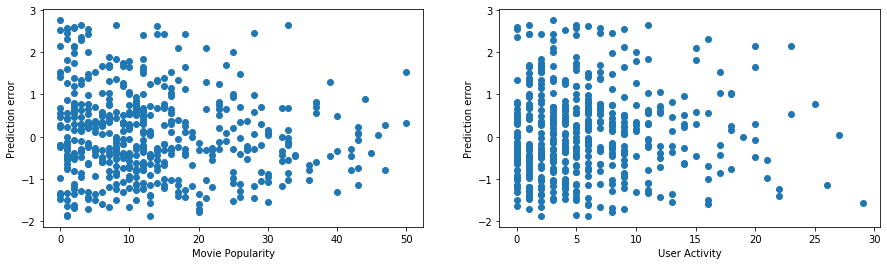

In [ ]:
# simplement tracer un sous-ensemble pour l'interprétabilité
subn = 500 
fig, (ax0, ax1) = plt.subplots(ncols=2)
fig.set_figwidth(15)
ax0.scatter(movie_popularity[:subn], err[:subn])
ax0.set_ylabel('Prediction error')
ax0.set_xlabel('Movie Popularity')

ax1.scatter(user_activity[:subn], err[:subn])
ax1.set_ylabel('Prediction error')
ax1.set_xlabel('User Activity');

Ces deux figures montrent l'erreur des prédictions (sur un sous-ensemble) de test versus la popularité des films (axe des x à gauche) et le niveau d'activité d'un utilisateur (axe des x à droite). Notez que:

- Cette distribution empirique semble symétrique, donc il y n'y a pas de biais particulier à des prédictions plus élevées ou plus basses.
- L'erreur de prédiction semble montrer que les films et les utilisateurs ayant plus de données ont aussi une plus petite erreur de prédiction (c.-à-d., les données forment un "triangle" pointant vers la droite, ceci devient beaucoup plus évident quand nous entraînons le modèle avec plus de données). Ce résultat tombe sous le sens, le plus de données le modèle observe sur un film, le plus précis le modèle devrait être pour ce film (son estimation de $\theta_{\text{mid}}$ sera plus précise). Cet effet est peut-être aussi renforcé par le fait que nous ayons divisé les données aléatoirement en entraînement et test. Il devient plus avantageux pour le modèle de correctement modéliser les films et les utilisateurs ayant le plus de données.

### 2.3 Régression linéaire avec les tags comme attribut.

Nous utilisons encore une fois un modèle de régression linéaire, mais nous y ajoutons les tags des films:

$$
f(x_{ui}) = \theta_\text{gender} x_{\text{gender}_u} + \theta_{\text{age}} x_{\text{age}_u} + \theta_\text{zip} x_{\text{zip}_u} + \theta_\text{occupation} x_{\text{occupation}_u} + \theta_\text{uid} x_{\text{uid}_u} + \theta_{\text{mid}} x_{\text{mid}_i} \mathbf{+ x_{\text{tags}_i}\boldsymbol\theta_\text{tags}}
$$ 

Le dernier terme à droite (en gras) est ajouté par rapport au modèle précédent.

**Question 5:** Comment pensez-vous que ce modèle performera par rapport au modèle précédent (Section 2.2.)? Pouvez-vous dire quelque chose de formel par rapport à sa performance?

**Indice:** Un des modèles est une généralisation de l'autre. 

In [ ]:
# Nous construisons maintenant un jeu de données en y ajoutant les tags (tid_*)
X_tags = data_pd_dum.filter(regex=('('+attributes+"|tid_*"+')'))
print(X_tags.shape)

# Divisons l'échantillon en Entraînement/Test.
# Nous utilisons la machine racine (seed) qu'avant pour s'assurer que la division sera la même
X_train_tags, X_test_tags, y_train_tags, y_test_tags = train_test_split(
    X_tags, rating, test_size=0.2, random_state=1234, shuffle=False)
print(X_train_tags.shape)

(19255, 8151)
(15404, 8151)


In [ ]:
# Créer l'oject de régression linéaire
regr_tags = linear_model.Ridge(alpha=10)

# Entraîner le modèle sur l'ensemble d'entraînement
start = time.time()
regr_tags.fit(X_train_tags, y_train_tags)
fit_time = time.time() - start

print("Temps de l'apprentissage du modèle: %.2f seconds" % fit_time)
print("Nombre de paramètres:", regr_tags.coef_.shape[0]+1)

Temps de l'apprentissage du modèle: 12.92 seconds
Nombre de paramètres: 8152


In [ ]:
# Obtenir les prédictions d'entraînement
y_train_pred = regr_tags.predict(X_train_tags)

print("Erreur au carré moyenne d'entraînement: %.4f"
      % mean_squared_error(y_train_tags, y_train_pred))

# Obtenir les prédictions de test
y_test_pred = regr_tags.predict(X_test_tags)

print("Erreur au carré moyenne de test: %.4f"
      % mean_squared_error(y_test_tags, y_test_pred))

Erreur au carré moyenne d'entraînement: 0.7264
Erreur au carré moyenne de test: 0.9914


À noter: l'erreur de test est de 0.99 pour ce modèle (2.3) comparé à une erreur MSE de test de 1.03 pour le modèle 2.2. Les tags semblent offrir une performance légèrement supérieure, mais elles ont aussi besoin d'un modèle d'une plus grande taille (968 paramètres en plus à estimer) ce qui prend environ 30% en plus à optimiser. Évidemment, ce n'est pas une comparaison exacte et elle dépend de votre ordinateur. Ceci étant dit, il semble quand même que l'algorithme d'estimation n'est pas linéaire (c.-à-d., augmenter le nombre de paramètres par 10%, augmente la durée de l'estimation par 30%).

***

### 2.4 Apprendre un modèle non linéaire

Pour l'instant nous avons étudié l'effet d'utiliser différents attributs sur un modèle linéaire. Il semble qu'ajouter des attributs aide à obtenir une meilleure performance de généralisation.

Maintenant nous explorerons un modèle non linéaire, un réseau de neurones à une couche cachée (les réseaux de neurones seront le thème des deux prochaines semaines). La tâche est les données ne changent pas, seulement le modèle.

**Le b.a.-ba des réseaux de neurones:** 
- Un réseau de neurones est constitué de neurones interconnectés. Chaque neurone n'effectue que quelques calculs simples. 
- Dans un réseau *feed-forward*, les neurones sont organisés dans des ensembles appelés couches (*layers*). 
 - Les neurones de chaque couche obtiennent leurs entrées des neurones de la couche précédente. Les neurones d'une couche envoient donc le résultat de leur calcul à la couche d'après. 
 - La première couche est appelée couche entrante (*input layer*) elle utilise directement les données et les passent à la seconde couche. La dernière couche est celle de sortie (*output layer*) elle calcule les prédictions finales $\hat{y}$. 
 - Les couches entre la couche d'entrée et de sortie sont appelées les couches cachées (*hidden layers*). Chaque neurone des couches cachées est un modèle linéaire suivit d'une fonction d'activation non linéaire (*activation function*): $f(x) = \sum_i x_i \theta_i$. 
  - Le nombre de neurones des couches d'entrée et de sortie est fixé par les données (le nombre des attributs et le nombre de prédictions par exemple). 
  - Le nombre de neurones de chaque couche cachée est un hyper paramètre. Un autre hyper paramètre est le nombre de couches cachées.

Mathématiquement, pour une tâche de régression (avec une seule prédiction par exemple), un réseau de neurones à une couche cachée est: 
$$ 
f(x) = f_\text{o} ( \sum_{j=0}^{|\text{hidden n.}|} \theta'_{j} f_\text{h}( \sum_{i=0}^{|p|}\theta_{ij} x_i ) ) 
$$ 
avec
- $\theta_{ij}$ les paramètres des entrées $i$ et neurone $j$ d'une couche cachée.
- $f_h$ est la fonction d'activation d'une couche cachée
- $\theta'_{j}$ sont les paramètres qui connectent le neurone $j$ de la couche cachée à la couche de sortie.
- $f_o$ est la fonction d'activation de la couche de sortie


Il peut être plus intuitif de visualiser l'architecture d'une réseau de neurones en dessinant les neurones comme étant de noeuds et les connections comme des arrêtes dans un graphe:

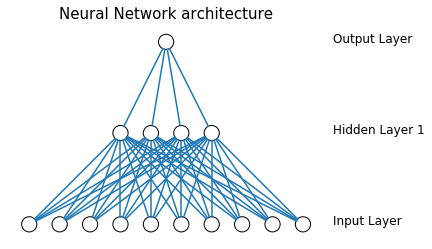

In [ ]:
# un réseau de neurones à une couche cachée où l'entrée à 10 dimensions (p=10) et la sortie une seule dimension
input_dims = 10 # p 
# nombre de neurones cachées pour chaque couche cachée (pour ajouter une couche il faut ajouter une dimension)
hidden_layers_size = [4] 
output_dims = 1 # nombre de sorties

network = DrawNN( [input_dims] + hidden_layers_size + [output_dims] )
network.draw()

In [ ]:
# Créer un réseau de neuronnes
regr_nn = neural_network.MLPRegressor(alpha=0.1, # l2-regularization (weight decay)
                                      hidden_layer_sizes=tuple(hidden_layers_size),
                                      early_stopping=True, # stop if validation performance decreases
                                      verbose=True,
                                      random_state=1234)

# Estimer les paramètres du réseau sur nos données

#normalize data
start = time.time()
regr_nn.fit(X_train_tags, y_train_tags)
fit_time = time.time() - start

print("Temps d'apprentissage du modèle: %.2f seconds" % fit_time)
print("Nombre de paramètres:", reduce(lambda x,y: x+y, 
                                       list(map(lambda x: x.size, regr_nn.coefs_+regr_nn.intercepts_)) ))

Iteration 1, loss = 6.56955926
Validation score: -4.536097
Iteration 2, loss = 2.12167821
Validation score: -1.250044
Iteration 3, loss = 1.24974278
Validation score: -0.973809
Iteration 4, loss = 1.15528883
Validation score: -0.885417
Iteration 5, loss = 1.09444618
Validation score: -0.797478
Iteration 6, loss = 1.03693099
Validation score: -0.715147
Iteration 7, loss = 0.98282816
Validation score: -0.634489
Iteration 8, loss = 0.93160967
Validation score: -0.558859
Iteration 9, loss = 0.88383214
Validation score: -0.488287
Iteration 10, loss = 0.83924576
Validation score: -0.420767
Iteration 11, loss = 0.79792269
Validation score: -0.357542
Iteration 12, loss = 0.75975209
Validation score: -0.302905
Iteration 13, loss = 0.72452769
Validation score: -0.248625
Iteration 14, loss = 0.69238867
Validation score: -0.198602
Iteration 15, loss = 0.66326857
Validation score: -0.155054
Iteration 16, loss = 0.63671488
Validation score: -0.119251
Iteration 17, loss = 0.61312702
Validation score:

Comme pour les autres modèles, nous pouvons régulariser les paramètres du réseau pour éviter le surentrainement:
- Nous utilisons la même taille du régularisateur L2 pour tous les paramètres. La taille du régularisateur est donnée par $\alpha$. 
- En plus, nous utilisons un second régularisateur qui se nomme `early-stopping`. L'apprentissage des paramètres dans un réseau de neurones est une procédure littérature en utilisant une méthode appelée descente de gradient (par rapport à la régression linéaire, il n'existe pas de solution analytique permettant de trouver les paramètres optimaux en fonction de la fonction d'objectif). Le *Early stopping* évalue simplement une erreur de validation après chaque itération d'entraînement. La procédure stoppe l'apprentissage une fois que l'erreur de validation arrête de progresser. Ceci peut évidemment arriver avant que l'erreur d'entraînement converge. Si ce n'est pas le cas, ce régularisateur n'a aucun effet sur l'apprentissage. Dans `scikit-learn`, la classe `MLPRegressor` avec `early_stopping=True` divise automatiquement l'ensemble d'entraînement en deux (validation et entraînement). Le désavantage évidemment est qu'il reste un tout petit moins de données pour s'entraîner.




**Question 6:** Pourquoi dans `sklearn` ce modèle permet-il de fixer une racine (c.-à-d., `random_state`) alors que le modèle de régression linéaire ne le permet pas? 


In [ ]:
# Obtenir les prédictions d'entraînement
y_train_pred = regr_nn.predict(X_train_tags)
#y_train_pred = regr_nn.predict(scaler.transform(X_train_tags))


print("Erreur au carré moyenne d'entraînement: %.4f"
      % mean_squared_error(y_train_tags, y_train_pred))

# Obtenir les prédictions de test
y_test_pred = regr_nn.predict(X_test_tags)
#y_test_pred = regr_nn.predict(scaler.transform(X_test_tags))

print("Erreur au carré moyenne de test: %.4f"
      % mean_squared_error(y_test_tags, y_test_pred))
#Train Mean squared error: 0.6623
#Test Mean squared error: 1.0465

Erreur au carré moyenne d'entraînement: 0.6416
Erreur au carré moyenne de test: 1.0292


Voici notre tableau des résultats

| Modèle        | MSE de test           |
| ------------- |:-------------:| 
| 2.2 (Reg. linéaire avec attributs)     | 1.031 | 0.8650  |
| 2.3 (2.2 + *tags* des films)     | 0.991 | 0.8571 |
| 2.4 (Réseau de neurones avec les attributs de 2.3) | 1.029 | 0.8650 | 

Même si les réseaux de neurones sont très puissants (leur capacité est haute), sur cette tâche le réseau de neurones entraîné n'améliore pas la performance d'un modèle de régression plus simple. Ce n'est évidemment pas indicatif de la performance de tous les réseaux de neurones (il est possible qu'une réseau de neurones un peu différents obtiennent de meilleurs résultats). 

<a id="concluding-remarks"></a>
### Section 3. Conclusions

Le but de ce tutoriel était de vous introduire à l'apprentissage automatique de manière très pratique et de complémenter le cours. Nous nous pencherons évidemment en détail sur les réseaux de neurones dans les semaines à venir.

Avant de terminer: 

#### Apprentissage automatique

Comme vous avez pu le constater, l'apprentissage machine pratique est très empirique. Une fois que vous avez des données dans un format correct, il est typique de les utiliser pour estimer et comparer différents modèles. Vous pouvez tenter de comprendre les avantages/désavantages de ces modèles dans votre contexte. C'est aussi une bonne manière de mieux comprendre vos données. En pratique, c'est souvent un aspect essentiel que nous n'avons pas énormément abordé dans ce tutoriel (au profit d'une meilleure exploration des modèles).


#### Scikit-learn
`scikit-learn` est une libraire de ML très pratique et puissant. C'est une boîte à outils de modèles ainsi que de routines pour prétraiter vos données. Elle offre une interface à une grande variété de modèles, elle reste activement développée et en général c'est une excellente plateforme. C'est aussi une libraire ouverte (*open source*) et gratuite à utiliser. 

Sélection de modèles: choisir le meilleur (ou même un bon) modèle pour une tâche particulière n'est pas une mince affaire. [Cette page](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) offre des conseils pour la sélection de modèles disponibles sur `scikit-learn`. N'oubliez pas qu'en pratique, la performance de test n'est souvent qu'une seule mesure parmi d'autres (qui peuvent inclure, par exemple, le temps d'estimation du modèle, le taux de faux positif ou faux négatifs, etc.)

Bien que très versatile, `scikit-learn` n'est pas utilisable pour tout. Par exemple, cette libraire n'offre que très peu de réseaux de neurones modernes. Ce n'est pas non plus, la plateforme idéale pour développer de nouveaux modèles.

#### D'autres libraires

La qualité des logiciels disponibles a largement contribué à la popularité de l'apprentissage automatique dans les dernières années. Les logiciels modernes automatisent une série de tâches qui permettent aux programmeurs d'être plus efficaces. `scikit-learn` est un outil très populaire, mais il existe évidemment d'autres librairies de bonne qualité (tant pour utiliser des modèles existants que pour développer de nouveaux modèles). Il peut évidemment être pratique et tentant d'apprendre plusieurs de ces librairies. À mon avis, c'est encore plus important d'avoir une compréhension des fondamentaux de l'apprentissage automatique d'autant plus que les librairies changent souvent très rapidement. 

#### Matière à réflexion
 - Dans nos modèles nous avons pris comme hypothèse que les notes sont les variables dépendantes (y) et que nous avions accès à des attributs des utilisateurs et des items. Imaginone une tâche où nous n'aurions pas accès à des attributs, ou bien à un cas où les attributs ne seraient pas informatifs des notes. Dans ce cas, le modèle de régression linéaire deviendrait: 
 
$$
f(x_{ui}) = \theta_\text{uid} x_{\text{uid}_u} + \theta_{\text{mid}} x_{\text{mid}_i}
$$ 
 

- **Question 7:** Quel est le problème avec ce dernier modèle? Je vous suggère d'y réfléchir un peu avant de lire la réponse. 

- Comme nous le verrons à la semaine 11 (sur les systèmes de recommandation), il existe plusieurs modèles qui utilisent les notes en entrée **et** en sortie. Par exemple, on pourrait directement utiliser les notes historiques d'un utilisateur pour prédire ses notes futures  (pour ce faire on pourrait utiliser un auto-encodeur).

## Références


Scikit-learn (en anglais)
- [Documentation](https://scikit-learn.org/stable/documentation.html)
- [Tutoriels](https://scikit-learn.org/stable/tutorial/index.html)
- [Aide à la sélection de modèles](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

# Bibliographie
